In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import omegaconf
from shell.utils.experiment_utils import *
from shell.fleet.utils.fleet_utils import *
from shell.utils.metric import *
import matplotlib.pyplot as plt
from shell.fleet.network import TopologyGenerator
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from shell.fleet.fleet import Agent, Fleet
from shell.fleet.data.data_utilize import *
from shell.fleet.data.recv import *

from sklearn.manifold import TSNE
from torchvision.utils import make_grid
from shell.fleet.data.data_utilize import *
import logging
from sklearn.metrics import f1_score
import os
from shell.fleet.data.recv_utils import *
from tqdm import tqdm
import argparse
from functools import partial
from torchvision.utils import make_grid
from shell.utils.oodloss import OODSeparationLoss
from pythresh.thresholds.dsn import DSN
from pythresh.thresholds.aucp import AUCP
from pythresh.thresholds.boot import BOOT
from pythresh.thresholds.zscore import ZSCORE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import defaultdict

logging.basicConfig(level=logging.INFO)

In [3]:
dataset = "combined"
algo = "modular"

experiment_folder = "combined_data_experiment_results"
experiment_name = "vanilla_jorge_setting_no_sparse_sync_True"

use_contrastive = False
num_trains_per_class = 64
seed = 0
num_tasks = 10
parallel = False



save_dir = get_save_dir(experiment_folder, experiment_name,
                        dataset, algo, num_trains_per_class, use_contrastive, seed)


In [4]:
fleet = setup_fleet(save_dir, task_id=5, parallel=False)

INFO:root:Class sequence: [5 0 4 3 4 6 4 3 8 0 1 0 5 9 6 4 9 0 3 0]
INFO:root:task 0 :(128, 1, 28, 28) (100, 1, 28, 28) (1872, 1, 28, 28)
INFO:root:task 1 :(128, 1, 28, 28) (100, 1, 28, 28) (1992, 1, 28, 28)
INFO:root:task 2 :(128, 1, 28, 28) (100, 1, 28, 28) (1940, 1, 28, 28)
INFO:root:task 3 :(128, 1, 28, 28) (100, 1, 28, 28) (1992, 1, 28, 28)


{'train': {'component_update_freq': 100, 'num_epochs': 100, 'init_component_update_freq': 100, 'init_num_epochs': 100, 'save_freq': 10}, 'dataset': {'dataset_name': 'combined', 'num_tasks': 10, 'num_classes_per_task': 2, 'with_replacement': True, 'num_trains_per_class': 64, 'num_vals_per_class': 50, 'remap_labels': True}, 'net': {'name': 'mlp', 'depth': 4, 'layer_size': 64, 'dropout': 0.5, 'no_sparse_basis': True}, 'sharing_strategy': {'name': 'no_sharing', 'num_coms_per_round': 0, 'sync_base': True, 'pre_or_post_comm': 'post'}, 'seed': 0, 'algo': 'modular', 'job_name': 'combined_modular_numtrain_64', 'num_agents': 8, 'root_save_dir': 'combined_data_experiment_results/vanilla_jorge_setting_no_sparse_sync_True', 'parallel': True, 'num_init_tasks': 4, 'overwrite': False, 'agent': {'save_dir': '${root_save_dir}/${job_name}/${dataset.dataset_name}/${algo}/seed_${seed}', 'batch_size': 64, 'memory_size': 32, 'improvement_threshold': 0.05, 'use_contrastive': False, 'use_ood_separation_loss': 

INFO:root:task 4 :(128, 1, 28, 28) (100, 1, 28, 28) (1954, 1, 28, 28)
INFO:root:task 5 :(128, 1, 28, 28) (100, 1, 28, 28) (2115, 1, 28, 28)
INFO:root:task 6 :(128, 1, 28, 28) (100, 1, 28, 28) (1901, 1, 28, 28)
INFO:root:task 7 :(128, 1, 28, 28) (100, 1, 28, 28) (1940, 1, 28, 28)
INFO:root:task 8 :(128, 1, 28, 28) (100, 1, 28, 28) (1989, 1, 28, 28)
INFO:root:task 9 :(128, 1, 28, 28) (100, 1, 28, 28) (1990, 1, 28, 28)
INFO:root:Class sequence: [4 7 5 7 6 0 3 0 5 0 3 6 2 7 6 7 6 1 0 5]
INFO:root:task 0 :(128, 1, 28, 28) (100, 1, 28, 28) (2000, 1, 28, 28)
INFO:root:task 1 :(128, 1, 28, 28) (100, 1, 28, 28) (2000, 1, 28, 28)
INFO:root:task 2 :(128, 1, 28, 28) (100, 1, 28, 28) (2000, 1, 28, 28)
INFO:root:task 3 :(128, 1, 28, 28) (100, 1, 28, 28) (2000, 1, 28, 28)
INFO:root:task 4 :(128, 1, 28, 28) (100, 1, 28, 28) (2000, 1, 28, 28)
INFO:root:task 5 :(128, 1, 28, 28) (100, 1, 28, 28) (2000, 1, 28, 28)
INFO:root:task 6 :(128, 1, 28, 28) (100, 1, 28, 28) (2000, 1, 28, 28)
INFO:root:task 7 :(128

i_size 28
num_classes 2
net_cfg {'name': 'mlp', 'depth': 4, 'layer_size': 64, 'dropout': 0.5, 'no_sparse_basis': True, 'i_size': 28, 'num_classes': 2, 'num_tasks': 10, 'num_init_tasks': 4, 'use_contrastive': False}
<class 'shell.learners.er_dynamic.CompositionalDynamicER'>
Setting seed 69420000
Setting seed 0
Setting seed 1000
Setting seed 2000
Setting seed 3000
Setting seed 4000
Setting seed 5000
Setting seed 6000
Setting seed 7000


In [5]:
fleet.change_save_dir('combined_dataset_engineering_experiment_results')

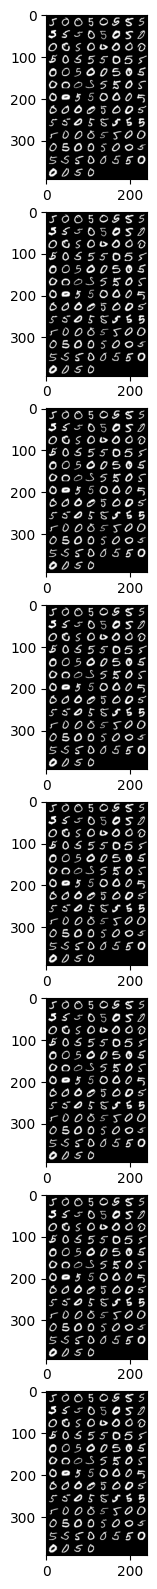

In [6]:
fig, ax = plt.subplots(len(fleet.agents), 1, figsize=(10, 20))
for i, agent in enumerate(fleet.agents):
    X = agent.dataset.valset[0].tensors[0]
    ax[i].imshow(make_grid(X).permute(1, 2, 0))
    

In [9]:
node = fleet.agents[0]
other = fleet.agents[1]
same_data = fleet.agents[3]
task_id = 4
testloaders = {task: torch.utils.data.DataLoader(testset,
                                                         batch_size=128,
                                                         shuffle=False,
                                                         num_workers=4,
                                                         pin_memory=True,
                                                         ) for task, testset in enumerate(other.dataset.testset[:(task_id+1)])}
eval_net(node.net, testloaders)

{0: 0.9348290598290598,
 1: 0.82,
 2: 0.9485,
 3: 0.9794176706827309,
 4: 0.572,
 'avg': 0.8509493461023581}

In [10]:
from shell.fleet.mod.modmod import *

In [11]:
task_id  = 5
agents = [other, node, same_data]

for agent in agents:
    for t in range(task_id):
        test = agent.dataset.valset[t]
        X, Y = test.tensors
        X = X.to(node.net.device)
        Y = Y.to(node.net.device)
        preds = predict(node.net, X, task_id, get_probs=True)
        print('t', t, 'agent', agent.node_id, log_expected_empirical_prediction(preds.cpu().numpy(), Y.cpu().numpy()))

t 0 agent 1 -0.46542368799146067
t 1 agent 1 -0.6579362122733304
t 2 agent 1 -0.62397818401844
t 3 agent 1 -0.655067445243478
t 4 agent 1 -0.6751799411020876
t 0 agent 0 -0.46542368799146067
t 1 agent 0 -0.6579362122733304
t 2 agent 0 -0.62397818401844
t 3 agent 0 -0.655067445243478
t 4 agent 0 -0.11876882917466369
t 0 agent 3 -0.46542368799146067
t 1 agent 3 -0.6579362122733304
t 2 agent 3 -0.62397818401844
t 3 agent 3 -0.655067445243478
t 4 agent 3 -0.6367544801234083


In [12]:
node.dataset.class_sequence # [1, 0]

array([5, 0, 5, 7, 4, 1, 3, 4, 8, 0, 1, 0, 5, 9, 6, 4, 9, 0, 3, 0])

In [13]:
same_data.dataset.class_sequence # [0, 3]

array([5, 0, 5, 7, 4, 1, 3, 4, 4, 5, 9, 3, 0, 6, 9, 1, 3, 1, 7, 9])

In [14]:
from shell.datasets.datasets import *

In [15]:
d = CombinedDataset(num_tasks=10, num_classes=10, num_classes_per_task=2)

TypeError: CombinedDataset.__init__() got an unexpected keyword argument 'num_classes'

In [16]:
for i in range(node.dataset.num_tasks):
    choose_agent_id = i % len(fleet.agents)
    chosen_d = fleet.agents[choose_agent_id].dataset
    task_id = chosen_d.class_sequence[i * chosen_d.num_classes_per_task : (i+1) * chosen_d.num_classes_per_task]
    d.testset.append(chosen_d.testset[i])
    d.trainset.append(chosen_d.trainset[i])
    d.valset.append(chosen_d.valset[i])
    d.class_sequence.extend(task_id)

NameError: name 'd' is not defined

: 